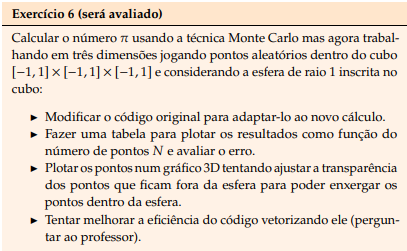

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def find_pi(num_pontos):
    #tomemos um cubo de aresta 2 e volume 8
    #Volume da esfera inscrita V = 4/3 pi

    #gera pontos aleatórios dentro do cubo
    x = 2*np.random.rand(num_pontos) -1
    y = 2*np.random.rand(num_pontos) -1
    z = 2*np.random.rand(num_pontos) -1

    raio2 = x**2 + y**2 + z**2 #distancia quadrada da origem

    pi = (3/4)* np.sum(np.int16(raio2<1))/num_pontos * 8  #calculo de pi
    
    return pi

In [3]:
num_pontos_list = [1e3, 1e4,1e5, 1e6, 1e7] #número de pontos a serem considerados
tabela = pd.DataFrame()  #tabela que será preenchida

In [4]:
def find_avg_pi(num_pontos, num_iterations):
    pi_values = []  #armazena valores de pi

    for i in range(num_iterations): #calcula pi para cada iteração com determinado número de pontos
        pi_values.append(find_pi(num_pontos))

    pi_values = np.array(pi_values)
    tabela[f'N = {num_pontos:.1e}'] = pi_values  #atualiza a tabela
    
    return (pi_values.mean(), pi_values.std(ddof=1))

In [5]:
num_pontos_list = [1e3, 1e4,1e5, 1e6, 1e7]
avg_pi_list = []
avg_pi_list_err = []

num_iterations = 10

for num_pontos in num_pontos_list:
    pi, pi_err = find_avg_pi(int(num_pontos), num_iterations)
    avg_pi_list.append(pi)
    avg_pi_list_err.append(pi_err)
    print("Feito " + str(num_pontos))

Feito 1000.0
Feito 10000.0
Feito 100000.0
Feito 1000000.0
Feito 10000000.0


In [6]:
tabela #exibir tabela encontrada

,N = 1.0e+03,N = 1.0e+04,N = 1.0e+05,N = 1.0e+06,N = 1.0e+07
0,2.994,3.1518,3.14526,3.140436,3.143483
1,3.060,3.1680,3.12954,3.141486,3.142298
2,3.042,3.1086,3.12834,3.140928,3.141832
3,3.114,3.0960,3.12696,3.138390,3.143014
4,3.108,3.1392,3.15108,3.139254,3.139616
5,3.150,3.1896,3.13668,3.142854,3.143680
6,3.120,3.1044,3.14736,3.138528,3.140269
7,3.030,3.1536,3.15000,3.137988,3.141456
8,3.180,3.1488,3.13512,3.144306,3.140158
9,3.066,3.1092,3.13002,3.143148,3.141026


In [7]:
avg_pi_list = np.array(avg_pi_list)
avg_pi_list_err = np.array(avg_pi_list_err)

erro_absoluto = np.abs(avg_pi_list - np.pi) #erro com respeito ao valor de referência
erro_previsto = avg_pi_list_err/np.sqrt(num_iterations) * 3 #intervalo de confiança de 98%

[3.0864     3.13692    3.138036   3.1407318  3.14168316]


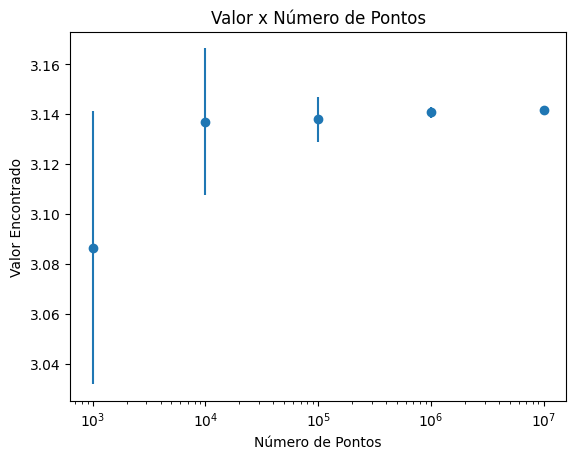

In [8]:
plt.errorbar(num_pontos_list, avg_pi_list, yerr=erro_previsto, marker = 'o', ls = '')
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Valor Encontrado")
plt.title("Valor x Número de Pontos")

print(avg_pi_list)

Text(0.5, 1.0, 'Erro x Número de Pontos')

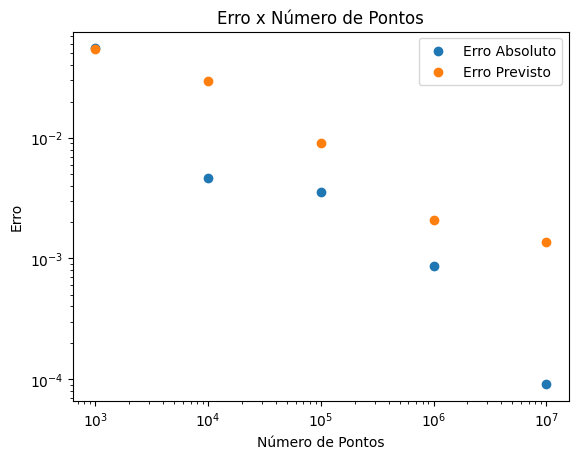

In [9]:
plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")

Text(0.5, 1.0, 'Erro x Número de Pontos')

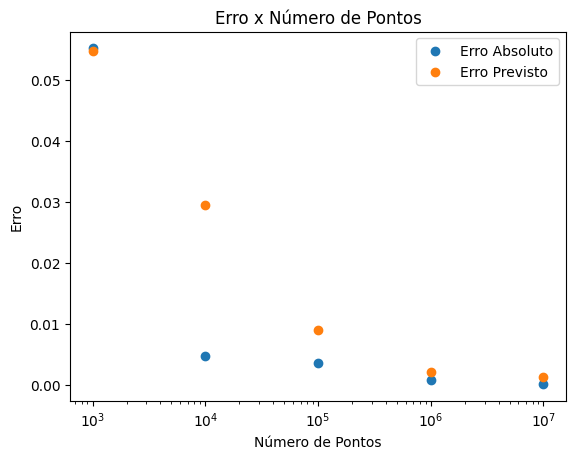

In [10]:
plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")

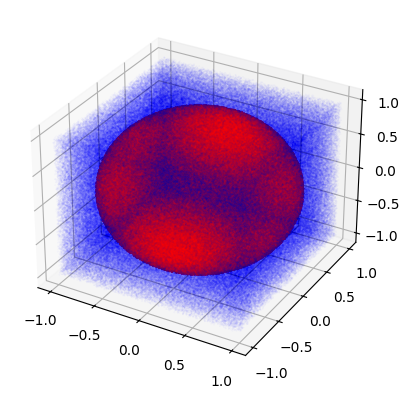

In [11]:
#Gráfico 3D
num_pontos = int(1e6)

#gera os pontos aleatórios
x = 2*np.random.rand(num_pontos) -1
y = 2*np.random.rand(num_pontos) -1
z = 2*np.random.rand(num_pontos) -1

raio2 = x**2 + y**2 + z**2 #distancia quadrada da origem
condicao = raio2<1  #condicao para estar dentro da esfera
not_condicao = condicao == 0 #negação da condicao

#faz o plot 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[condicao], y[condicao], z[condicao], color = 'red', s=0.1, alpha=1)
ax.scatter(x[not_condicao], y[not_condicao], z[not_condicao], color = 'blue', s=0.1, alpha = 0.03) #alpha ajusta a transparência